In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("movies.csv")
df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df = df.dropna()

# Replace | with space in genres
df["genres"] = df["genres"].str.replace("|", " ", regex=False)


In [5]:
df["text"] = df["title"] + " " + df["genres"]


In [6]:
df["label"] = df["genres"].apply(lambda x: x.split()[0])


In [7]:
genre_counts = df["label"].value_counts()

# Keep genres with at least 10 samples
valid_genres = genre_counts[genre_counts >= 10].index
df = df[df["label"].isin(valid_genres)]

print("Remaining genres:", df["label"].nunique())


Remaining genres: 19


In [8]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    ngram_range=(1, 2)
)

X = tfidf.fit_transform(df["text"])
y = df["label"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=42,
    stratify=y
)


In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)


In [11]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)


In [12]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


In [13]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    return [name, acc, precision, recall, f1]


In [14]:
results = []

results.append(evaluate_model("KNN", y_test, knn_pred))
results.append(evaluate_model("SVM", y_test, svm_pred))
results.append(evaluate_model("Random Forest", y_test, rf_pred))

metrics_df = pd.DataFrame(
    results,
    columns=["Algorithm", "Accuracy", "Precision", "Recall", "F1-Score"]
)

metrics_df


,Algorithm,Accuracy,Precision,Recall,F1-Score
0,KNN,0.965833,0.965637,0.965833,0.964502
1,SVM,0.998373,0.998472,0.998373,0.998401
2,Random Forest,0.998801,0.998805,0.998801,0.998799


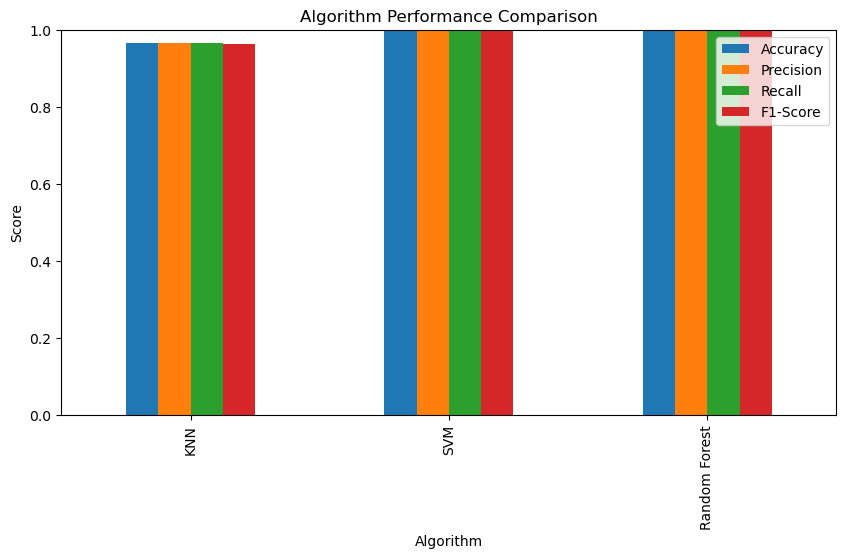

In [15]:
metrics_df.set_index("Algorithm").plot(
    kind="bar",
    figsize=(10,5)
)

plt.title("Algorithm Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()


In [16]:
print("KNN Classification Report\n")
print(classification_report(y_test, knn_pred))

print("SVM Classification Report\n")
print(classification_report(y_test, svm_pred))

print("Random Forest Classification Report\n")
print(classification_report(y_test, rf_pred))


KNN Classification Report

              precision    recall  f1-score   support

         (no       0.98      0.99      0.99      2832
      Action       0.97      0.98      0.98      3867
   Adventure       0.96      0.94      0.95      1321
   Animation       0.98      0.96      0.97      1341
    Children       0.97      0.95      0.96       880
      Comedy       0.95      0.98      0.97      7385
       Crime       0.98      0.97      0.98      1620
 Documentary       0.97      0.97      0.97      3505
       Drama       0.96      0.98      0.97      8272
     Fantasy       0.95      0.74      0.83       205
   Film-Noir       0.71      0.80      0.75        15
      Horror       0.98      0.98      0.98      2002
     Musical       0.67      0.05      0.09        41
     Mystery       0.95      0.72      0.82       226
     Romance       0.93      0.81      0.87       321
      Sci-Fi       1.00      0.89      0.94       301
    Thriller       0.99      0.84      0.91       574


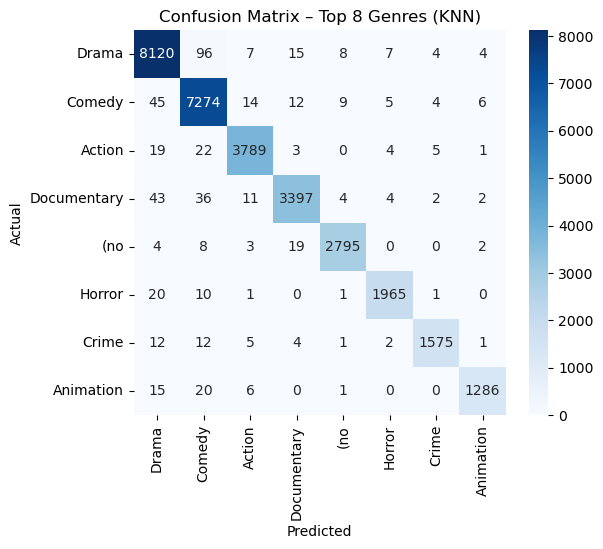

In [17]:
top_genres = y.value_counts().head(8).index

mask = y_test.isin(top_genres)
y_test_small = y_test[mask]
knn_pred_small = knn_pred[mask]

cm = confusion_matrix(y_test_small, knn_pred_small, labels=top_genres)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=top_genres,
            yticklabels=top_genres)
plt.title("Confusion Matrix – Top 8 Genres (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


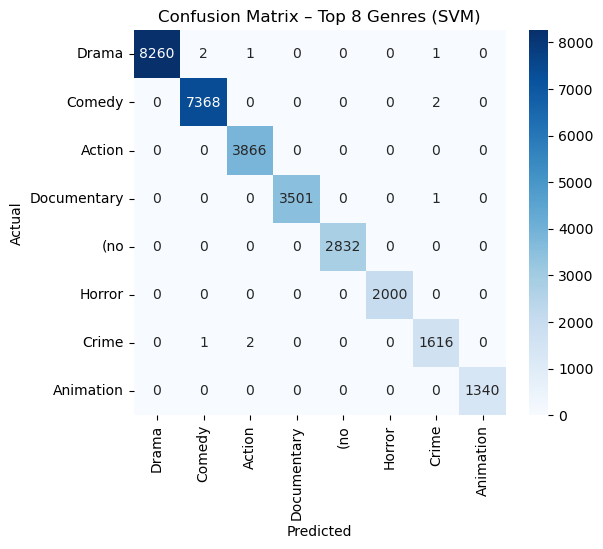

In [18]:
top_genres = y.value_counts().head(8).index

mask = y_test.isin(top_genres)
y_test_small = y_test[mask]
svm_pred_small = svm_pred[mask]

cm = confusion_matrix(y_test_small, svm_pred_small, labels=top_genres)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=top_genres,
            yticklabels=top_genres)
plt.title("Confusion Matrix – Top 8 Genres (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


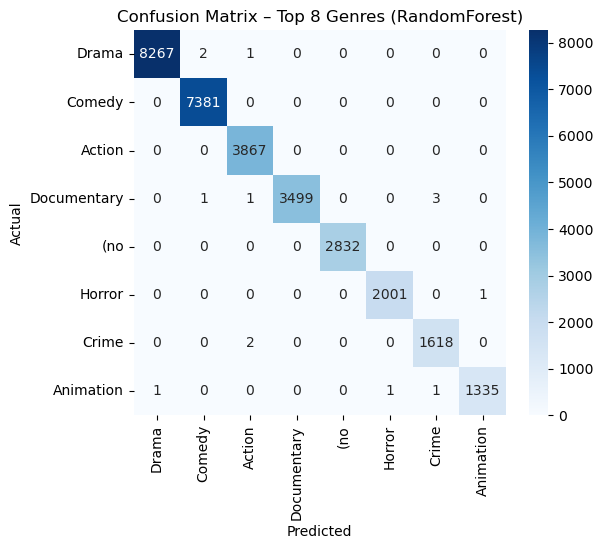

In [19]:
top_genres = y.value_counts().head(8).index

mask = y_test.isin(top_genres)
y_test_small = y_test[mask]
rf_pred_small = rf_pred[mask]

cm = confusion_matrix(y_test_small, rf_pred_small, labels=top_genres)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=top_genres,
            yticklabels=top_genres)
plt.title("Confusion Matrix – Top 8 Genres (RandomForest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
